In [ ]:
import pandas as pd

# import Libraries
from IPython.display import clear_output
from io import StringIO
import requests
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url=pd.read_csv("https://github.com/saqibmujtaba/Machine-Learning/blob/DataFiles/investment-growth-forcast.csv")
s=requests.get(url).text

dataset=pd.read_csv(StringIO(s))

In [39]:
%matplotlib inline

In [5]:
# Gives columns that need to be encoded
def columnsToEncode(df):
    return list(df.select_dtypes(include=['category','object']))

columnsToEncode(dataset)

['Deposit']

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
Deposit       19 non-null object
Months        19 non-null int64
PFT_Perc      19 non-null float64
PFT           19 non-null float64
Investment    19 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 832.0+ bytes


In [7]:
# Size of data

print(dataset.shape)

(19, 5)


In [8]:
# Co-relation between different varaibles.

pd.set_option('display.width',100)
pd.set_option('precision',3)
corr = dataset.corr(method='pearson', min_periods=1)

dataset.corr(method='pearson', min_periods=1)

,Months,PFT_Perc,PFT,Investment
Months,1.000,-0.482,0.645,0.928
PFT_Perc,-0.482,1.000,0.068,-0.370
PFT,0.645,0.068,1.000,0.796
Investment,0.928,-0.370,0.796,1.000


In [9]:
import seaborn as sns

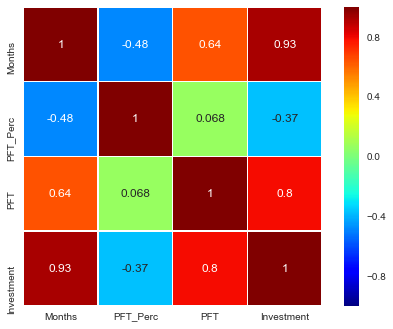

In [10]:
# Visualize co-relation by creating Co-relational Matrix

sns.heatmap(corr, cmap='jet',square=True, linewidths=.5,annot=True)

plt.show()

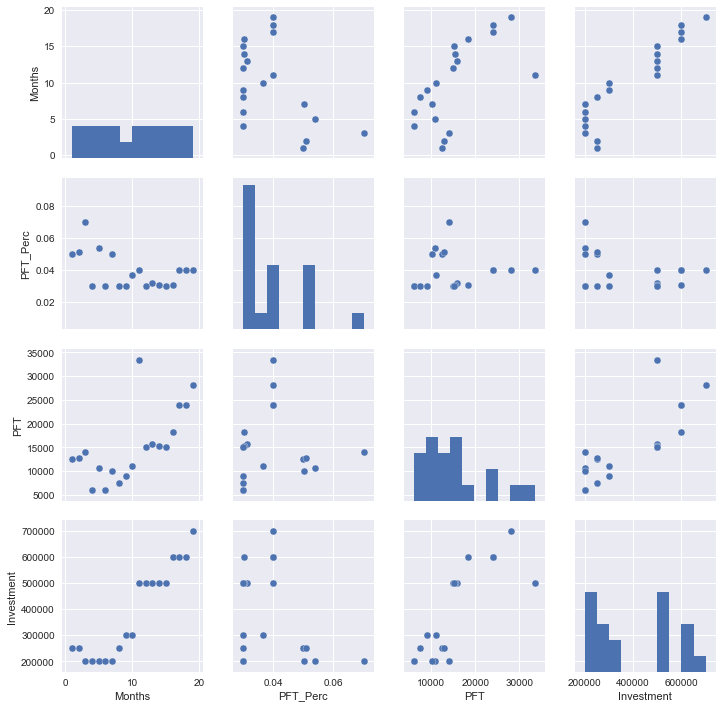

In [40]:
# Seaborn Pairplot
sns.pairplot(data=dataset)

In [12]:
predictors=[ 'Months', 'PFT_Perc','PFT']
X=dataset[predictors]
y=dataset['Investment']

In [13]:
print X.sample(5)

    Months  PFT_Perc      PFT
9       10     0.037  11045.4
4        5     0.054  10756.0
10      11     0.040  33470.0
18      19     0.040  28070.0
3        4     0.030   6000.0


In [14]:
# Multi Linear Regression

In [15]:
import statsmodels.api as sm

In [16]:
X = sm.add_constant(X)

In [17]:
X.iloc[:5,[0,1,2,3]]

,const,Months,PFT_Perc,PFT
0,1,1,0.050,12500.0
1,1,2,0.051,12750.0
2,1,3,0.070,14000.0
3,1,4,0.030,6000.0
4,1,5,0.054,10756.0


In [32]:
regressor_OLS = sm.OLS(endog=y,exog=X.iloc[:,[0,1,2,3]]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     69.99
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           4.76e-09
Time:                        11:38:02   Log-Likelihood:                -229.98
No. Observations:                  19   AIC:                             468.0
Df Residuals:                      15   BIC:                             471.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.122e+05   6.63e+04      1.691      0.1

In [19]:
regressor_OLS = sm.OLS(endog=y,exog=X.iloc[:,[0,1,2]]).fit()
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     53.27
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           8.45e-08
Time:                        11:36:31   Log-Likelihood:                -236.36
No. Observations:                  19   AIC:                             478.7
Df Residuals:                      16   BIC:                             481.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.448e+04   8.42e+04      0.291      0.7

In [20]:
regressor_OLS = sm.OLS(endog=y,exog=X.iloc[:,[0,1,3]]).fit()
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     103.7
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           6.93e-10
Time:                        11:36:32   Log-Likelihood:                -230.66
No. Observations:                  19   AIC:                             467.3
Df Residuals:                      16   BIC:                             470.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.824e+04   2.71e+04      1.779      0.0

In [21]:
regressor_OLS = sm.OLS(endog=y,exog=X.iloc[:,[0,2,3]]).fit()
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     34.96
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           1.45e-06
Time:                        11:36:34   Log-Likelihood:                -239.73
No. Observations:                  19   AIC:                             485.5
Df Residuals:                      16   BIC:                             488.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.553e+05   7.59e+04      4.678      0.0

In [22]:
regressor_OLS = sm.OLS(endog=y,exog=X.iloc[:,[0,3]]).fit() # R$D and Mrkt Spends
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     29.32
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           4.64e-05
Time:                        11:36:35   Log-Likelihood:                -246.18
No. Observations:                  19   AIC:                             496.4
Df Residuals:                      17   BIC:                             498.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.064e+05   5.74e+04      1.852      0.0

In [23]:
# Choosing Best based of Backward Elimination

In [33]:
regressor_OLS = sm.OLS(endog=y,exog=X.iloc[:,[0,1,3]]).fit()
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Investment   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     103.7
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           6.93e-10
Time:                        11:38:10   Log-Likelihood:                -230.66
No. Observations:                  19   AIC:                             467.3
Df Residuals:                      16   BIC:                             470.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.824e+04   2.71e+04      1.779      0.0

In [38]:
# We need to pass Intercept always = 1
regressor_OLS.predict([[1,20,32000]])

array([ 738277.02558721])

In [26]:
# Creating dataframe for 

df_Predict=pd.DataFrame({'Actual':y, 'Predicted':regressor_OLS.fittedvalues},columns = ['Actual','Predicted'])
df_Predict['Deviation']=df_Predict['Actual']-df_Predict['Predicted']

In [27]:
df_Predict.sample(10)

,Actual,Predicted,Deviation
5,200000,227039.451,-27039.451
10,500000,552134.576,-52134.576
1,250000,192089.061,57910.939
8,300000,316673.180,-16673.180
16,600000,609693.399,-9693.399
15,600000,543059.951,56940.049
0,250000,168167.272,81832.728
4,200000,242349.693,-42349.693
18,700000,685515.071,14484.929
12,500000,456796.133,43203.867


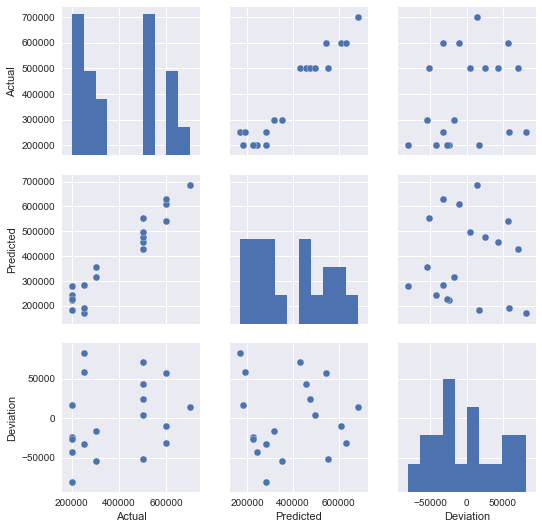

In [41]:
sns.pairplot(data=df_Predict)